In [1]:
import cv2
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.fABBA_test import fABBA
import matplotlib.gridspec as gridspec
from skimage.metrics import mean_squared_error

!rm -r 'datasets/image_samples/.ipynb_checkpoints'

rm: cannot remove 'datasets/image_samples/.ipynb_checkpoints': No such file or directory


In [2]:
def load_images(folder, shape=(250, 250)):
    images = list()
    figs = os.listdir(folder)
    for filename in figs:
        img = cv2.imread(os.path.join(folder,filename)) 
        img = cv2.cvtColor(img,  cv2.COLOR_BGR2RGB) # transform to grayscale: cv2.COLOR_BGR2GRAY or RGB cv2.COLOR_BGR2RGB
        img = cv2.resize(img, shape) # resize to 80x80
        if img is not None:
            images.append(img)
    images = np.array(images)
    # images = images.reshape(images.shape[0], images.shape[1]*images.shape[2])
    return images

def reassign_labels(labels, fix=None):
    if fix != None:
        value_count = pd.Series(labels[labels != fix]).value_counts()
    else:
        value_count = pd.Series(labels).value_counts()
    change = dict(zip(value_count.index, np.arange(value_count.shape[0])))
    change[fix] = value_count.shape[0]
    clabels = copy.deepcopy(labels)
    for i in range(len(labels)):
        labels[i] = change[labels[i]]
    return labels

In [3]:
folder = 'datasets/image_samples/'
data =  load_images(folder,shape=(250,250))

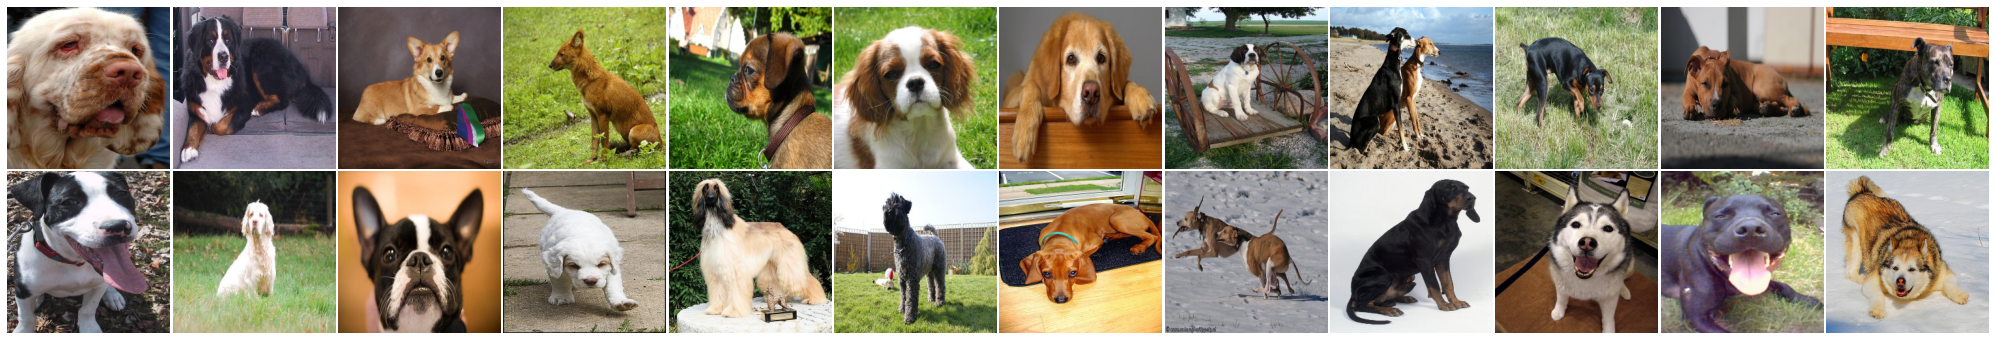

In [4]:
fig, axs = plt.subplots(2, 12, figsize=(35.5,6))
for i in range(2):
    for j in range(12):
        axs[i,j].axis("off")
        axs[i,j].imshow(data[i*12 + j])
    plt.subplots_adjust(wspace=0.02, hspace=0.01)
plt.savefig('results/images/dogs_all.pdf', bbox_inches='tight')
plt.show()

Image 0:
Compression: Reduced series of length 187500 to 15920 segments. Digitization: Reduced 15920 pieces to 2100 symbols.
Compression rate:0.085  Digitization rate:0.132  MSE:1172.323

Image 1:
Compression: Reduced series of length 187500 to 5974 segments. Digitization: Reduced 5974 pieces to 2419 symbols.
Compression rate:0.032  Digitization rate:0.405  MSE:750.149

Image 2:
Compression: Reduced series of length 187500 to 41002 segments. Digitization: Reduced 41002 pieces to 1739 symbols.
Compression rate:0.219  Digitization rate:0.042  MSE:246.429

Image 3:
Compression: Reduced series of length 187500 to 131464 segments. Digitization: Reduced 131464 pieces to 1637 symbols.
Compression rate:0.701  Digitization rate:0.012  MSE:214.352

Image 4:
Compression: Reduced series of length 187500 to 62364 segments. Digitization: Reduced 62364 pieces to 2975 symbols.
Compression rate:0.333  Digitization rate:0.048  MSE:662.904

Image 5:
Compression: Reduced series of length 187500 to 59101 s

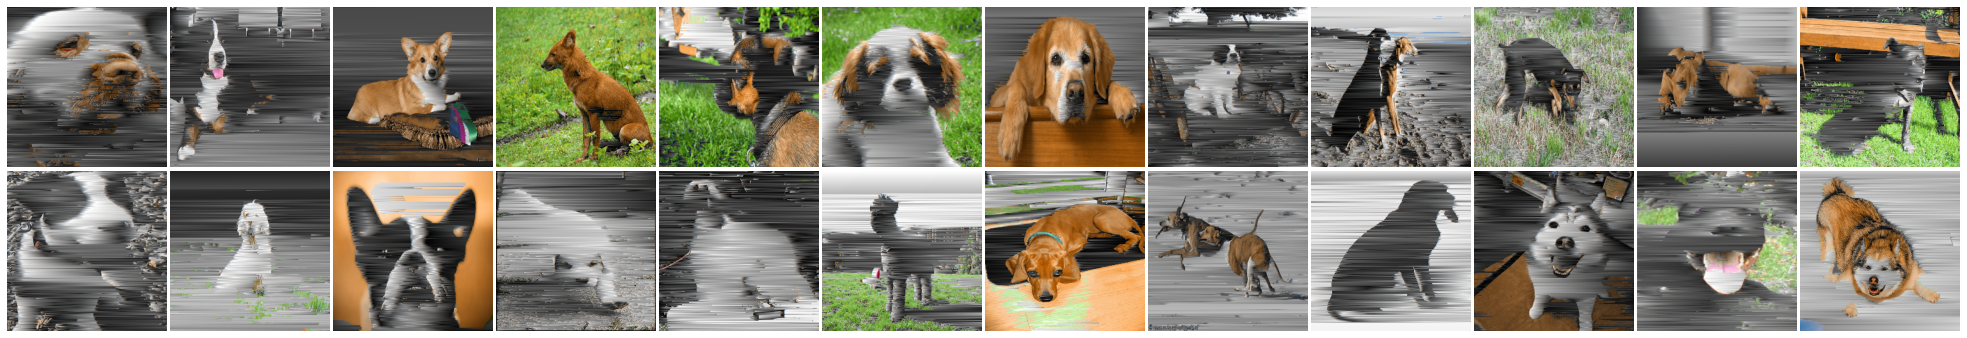

In [5]:
com_r = list()
dig_r = list()
mse = list()
save_df = pd.DataFrame()

fig, axs = plt.subplots(2, 12, figsize=(35,6))
for i in range(2):
    for j in range(12):
        axs[i,j].axis("off")
        print("Image {}:".format(i*12 + j))
        fabba = fABBA(tol=0.5, scl=1, sorting="2-norm", alpha=0.001, verbose=1, max_len=np.inf) 
        strings, start, f = fabba.image_compress(data[i*12 + j], adjust=True)
        reconstruction = fabba.image_decompress(strings, start, data[i*12 + j].shape)
        
        com_r.append(f.compression_rate)
        dig_r.append(f.digitization_rate)
        mse.append(mean_squared_error(data[i*12 + j], reconstruction))
        
        print("Compression rate:{0:.3f}".format(com_r[-1]), "", 
              "Digitization rate:{0:.3f}".format(dig_r[-1]), "",
              "MSE:{0:.3f}".format(mse[-1]))
        print()
        axs[i,j].imshow(reconstruction)
    plt.subplots_adjust(wspace=0.02, hspace=0.01)
plt.savefig('results/images/reconst_dogs_all_0.5.pdf', bbox_inches='tight')
plt.show()

save_df['Compression rate 0.5'] = com_r
save_df['Digitization rate 0.5'] = dig_r
save_df['MSE 0.5'] = mse

Image 0:
Compression: Reduced series of length 187500 to 41607 segments. Digitization: Reduced 41607 pieces to 2555 symbols.
Compression rate:0.222  Digitization rate:0.061  MSE:537.649

Image 1:
Compression: Reduced series of length 187500 to 9451 segments. Digitization: Reduced 9451 pieces to 2896 symbols.
Compression rate:0.050  Digitization rate:0.306  MSE:435.692

Image 2:
Compression: Reduced series of length 187500 to 55316 segments. Digitization: Reduced 55316 pieces to 1710 symbols.
Compression rate:0.295  Digitization rate:0.031  MSE:155.680

Image 3:
Compression: Reduced series of length 187500 to 151455 segments. Digitization: Reduced 151455 pieces to 1316 symbols.
Compression rate:0.808  Digitization rate:0.009  MSE:69.604

Image 4:
Compression: Reduced series of length 187500 to 76835 segments. Digitization: Reduced 76835 pieces to 2936 symbols.
Compression rate:0.410  Digitization rate:0.038  MSE:316.556

Image 5:
Compression: Reduced series of length 187500 to 72113 seg

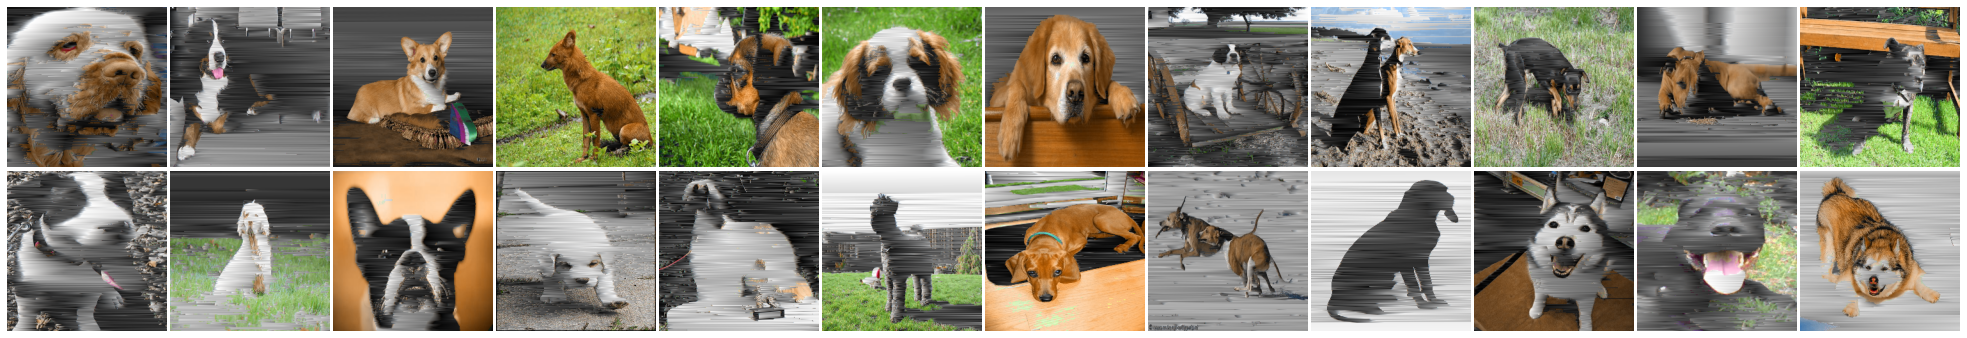

In [6]:
com_r = list()
dig_r = list()
mse = list()

fig, axs = plt.subplots(2, 12, figsize=(35,6))
for i in range(2):
    for j in range(12):
        axs[i,j].axis("off")
        print("Image {}:".format(i*12 + j))
        fabba = fABBA(tol=0.3, scl=1, sorting="2-norm", alpha=0.001, verbose=1, max_len=np.inf) 
        strings, start, f = fabba.image_compress(data[i*12 + j], adjust=True)
        reconstruction = fabba.image_decompress(strings, start, data[i*12 + j].shape)
        
        com_r.append(f.compression_rate)
        dig_r.append(f.digitization_rate)
        mse.append(mean_squared_error(data[i*12 + j], reconstruction))
        
        print("Compression rate:{0:.3f}".format(com_r[-1]), "", 
              "Digitization rate:{0:.3f}".format(dig_r[-1]), "",
              "MSE:{0:.3f}".format(mse[-1]))
        print()
        axs[i,j].imshow(reconstruction)
    plt.subplots_adjust(wspace=0.02, hspace=0.01)
plt.savefig('results/images/reconst_dogs_all_0.3.pdf', bbox_inches='tight')
plt.show()

save_df['Compression rate 0.3'] = com_r
save_df['Digitization rate 0.3'] = dig_r
save_df['MSE 0.3'] = mse


Image 0:
Compression: Reduced series of length 187500 to 97202 segments. Digitization: Reduced 97202 pieces to 1959 symbols.
Compression rate:0.518  Digitization rate:0.020  MSE:68.477

Image 1:
Compression: Reduced series of length 187500 to 27578 segments. Digitization: Reduced 27578 pieces to 3720 symbols.
Compression rate:0.147  Digitization rate:0.135  MSE:135.552

Image 2:
Compression: Reduced series of length 187500 to 68227 segments. Digitization: Reduced 68227 pieces to 1605 symbols.
Compression rate:0.364  Digitization rate:0.024  MSE:55.538

Image 3:
Compression: Reduced series of length 187500 to 168254 segments. Digitization: Reduced 168254 pieces to 950 symbols.
Compression rate:0.897  Digitization rate:0.006  MSE:10.136

Image 4:
Compression: Reduced series of length 187500 to 99868 segments. Digitization: Reduced 99868 pieces to 2632 symbols.
Compression rate:0.533  Digitization rate:0.026  MSE:78.511

Image 5:
Compression: Reduced series of length 187500 to 102723 segm

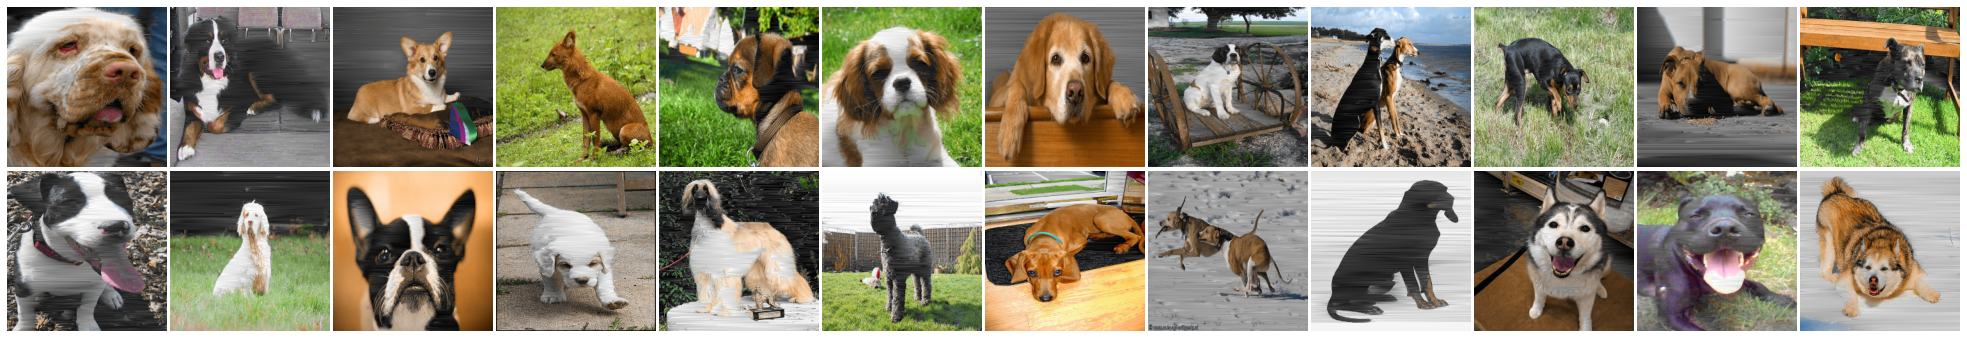

In [7]:
com_r = list()
dig_r = list()
mse = list()

fig, axs = plt.subplots(2, 12, figsize=(35,6))
for i in range(2):
    for j in range(12):
        axs[i,j].axis("off")
        print("Image {}:".format(i*12 + j))
        fabba = fABBA(tol=0.1, scl=1, sorting="2-norm", alpha=0.001, verbose=1, max_len=np.inf) 
        strings, start, f = fabba.image_compress(data[i*12 + j], adjust=True)
        reconstruction = fabba.image_decompress(strings, start, data[i*12 + j].shape)
        
        com_r.append(f.compression_rate)
        dig_r.append(f.digitization_rate)
        mse.append(mean_squared_error(data[i*12 + j], reconstruction))
        
        print("Compression rate:{0:.3f}".format(com_r[-1]), "", 
              "Digitization rate:{0:.3f}".format(dig_r[-1]), "",
              "MSE:{0:.3f}".format(mse[-1]))
        print()
        axs[i,j].imshow(reconstruction)
    plt.subplots_adjust(wspace=0.02, hspace=0.01)
plt.savefig('results/images/reconst_dogs_all_0.1.pdf', bbox_inches='tight')
plt.show()

save_df['Compression rate 0.1'] = com_r
save_df['Digitization rate 0.1'] = dig_r
save_df['MSE 0.1'] = mse
save_df.to_csv('results/infoIMG.csv', index=False)